In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ALLerrordataset.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [3]:
df=df.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)

In [4]:
df=df.drop(labels=["timefirstbyte","contentlength","timetoserv","maxage","sid"],axis=1)

In [5]:
df=df.drop(labels=["path","@timestamp","uid"],axis=1)

In [6]:
df_livetv = df[df['host'] == 7]

In [7]:
df_livetv=df_livetv.drop(labels=["contentpackage","devicemodel","devicebrand", "assetnumber"],axis=1)

In [8]:
df_livetv=df_livetv.drop(labels=["cachecontrol"],axis=1)

In [9]:
df_livetv=df_livetv.drop(labels=["uamajor"],axis=1)

In [10]:
df_livetv=df_livetv.drop(labels=["devicefamily","host","method", "cachename"],axis=1)

In [11]:
df_livetv=df_livetv.drop(labels=["protocol","osfamily", "coordinates"],axis=1)

In [12]:
df_livetv.head()

,statuscode,contenttype,uafamily,livechannel
70,400,text/html; charset=utf-8,12.0,NaN
73,400,text/html; charset=utf-8,12.0,NaN
74,400,text/html; charset=utf-8,12.0,NaN
75,400,text/html; charset=utf-8,12.0,NaN
79,412,text/html,12.0,60.0


In [13]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   43670 non-null  int64  
 1   contenttype  42588 non-null  object 
 2   uafamily     38898 non-null  float64
 3   livechannel  16238 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
df_livetv.drop_duplicates(subset=None, keep='first', inplace=True)

In [15]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 70 to 249595
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   21 non-null     int64  
 1   contenttype  11 non-null     object 
 2   uafamily     13 non-null     float64
 3   livechannel  16 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 840.0+ bytes


In [16]:
df_livetv.statuscode.value_counts().sort_values()

403    1
412    2
503    4
400    5
404    9
Name: statuscode, dtype: int64

In [17]:
df_livetv.contenttype.value_counts().sort_values()

text/html                   2
text/html; charset=utf-8    9
Name: contenttype, dtype: int64

In [18]:
df_livetv.uafamily.value_counts().sort_values()

3.0      1
1.0      1
23.0     1
12.0    10
Name: uafamily, dtype: int64

In [19]:
df_livetv.livechannel.value_counts().sort_values()

86.0    1
82.0    1
58.0    2
57.0    2
59.0    2
60.0    4
68.0    4
Name: livechannel, dtype: int64

In [20]:
df_livetv['uafamily']=df_livetv['uafamily'].fillna(df_livetv['uafamily'].mode()[0])
df_livetv['contenttype']=df_livetv['contenttype'].fillna(df_livetv['contenttype'].mode()[0])
df_livetv['livechannel']=df_livetv['livechannel'].fillna(df_livetv['livechannel'].mode()[0])

In [21]:
df_livetv.head()

,statuscode,contenttype,uafamily,livechannel
70,400,text/html; charset=utf-8,12.0,60.0
79,412,text/html,12.0,60.0
85,404,text/html; charset=utf-8,12.0,68.0
298,412,text/html,12.0,60.0
917,404,text/html; charset=utf-8,12.0,58.0


In [22]:
n = df_livetv.copy()

In [23]:
n_1 = pd.get_dummies(n, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel'])
print(n_1)

        statuscode_400  statuscode_403  statuscode_404  statuscode_412  \
70                   1               0               0               0   
79                   0               0               0               1   
85                   0               0               1               0   
298                  0               0               0               1   
917                  0               0               1               0   
3124                 0               0               1               0   
4282                 0               0               1               0   
7637                 0               0               0               0   
12669                0               1               0               0   
15725                0               0               1               0   
20385                1               0               0               0   
23606                0               0               1               0   
28064                1               0

For 2 clusters the average silhouette_score is : 0.2767135275390317
For 3 clusters the average silhouette_score is : 0.306365378013786
For 4 clusters the average silhouette_score is : 0.3910953783766221
For 5 clusters the average silhouette_score is : 0.38731347140754724


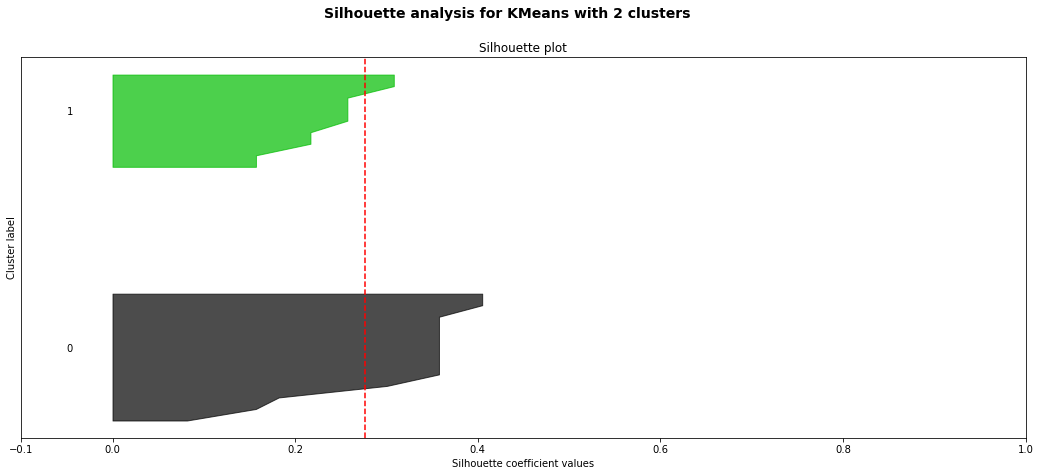

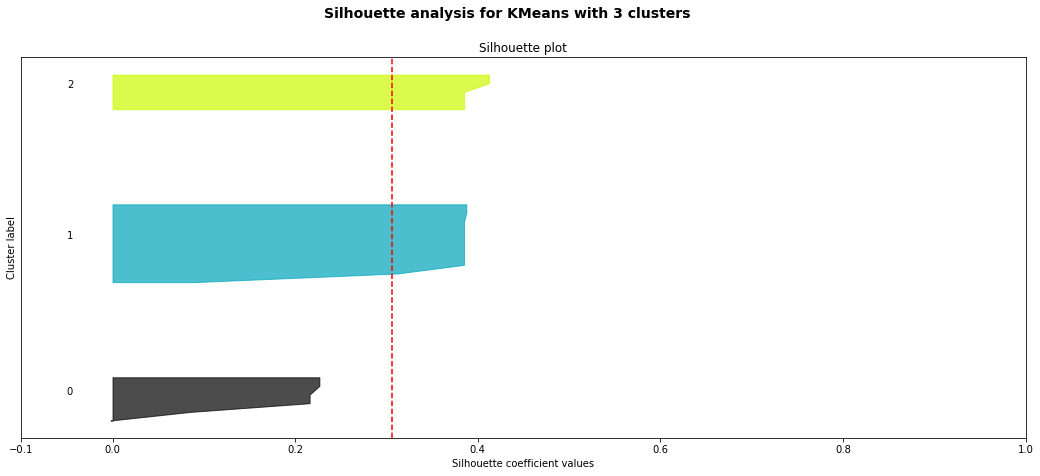

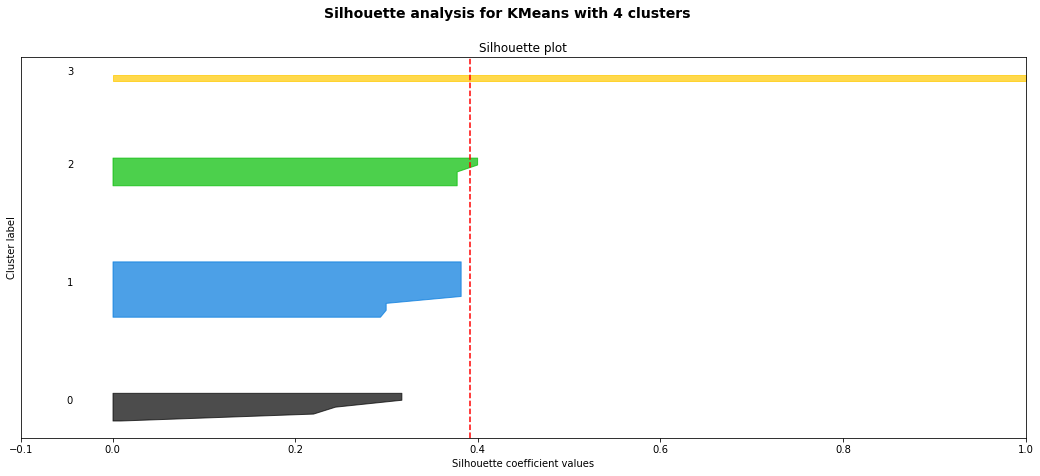

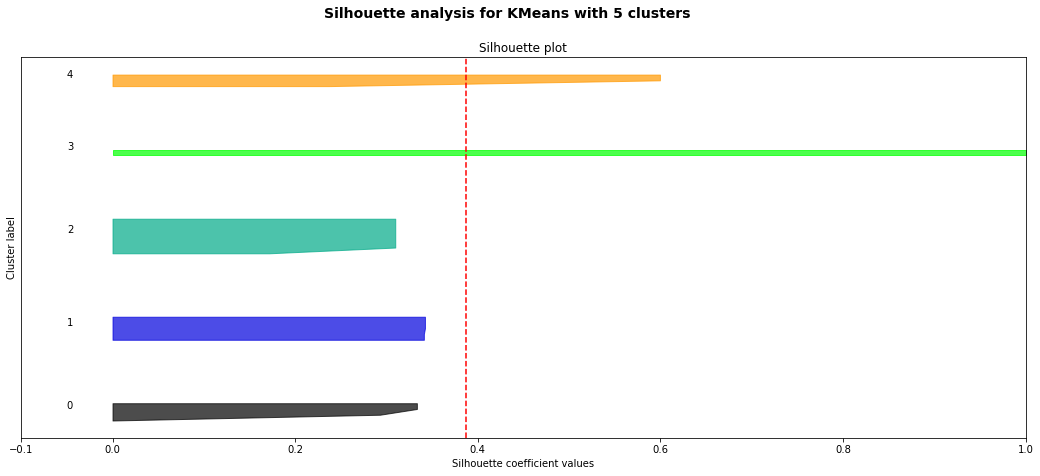

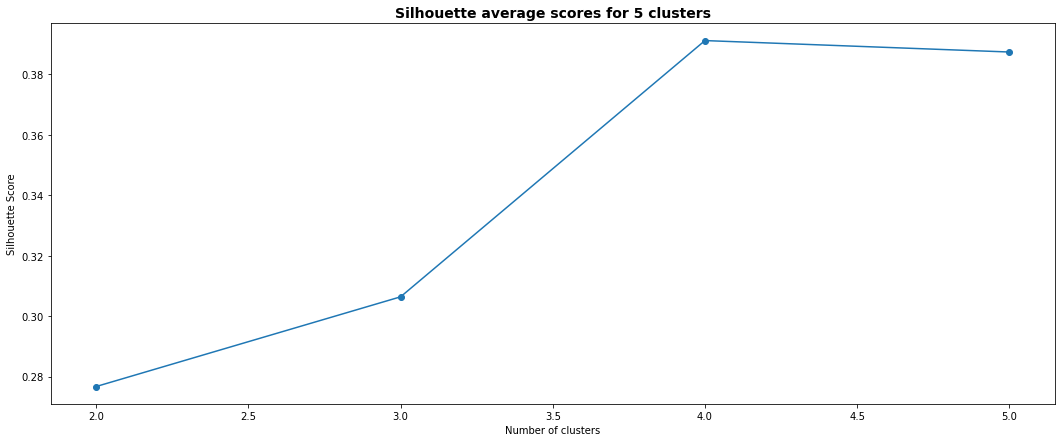

In [86]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(n_1)

    labels_pred = kmeans.predict(n_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(n_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(n_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

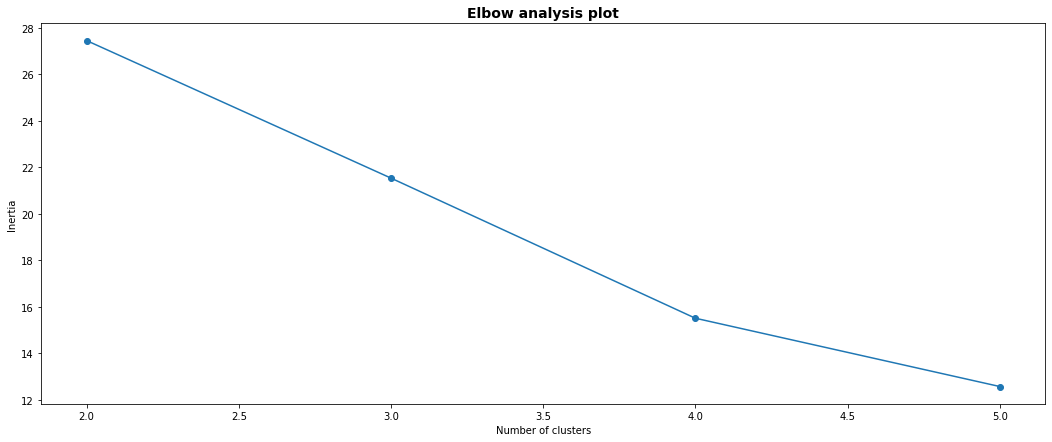

In [87]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [28]:
from kmodes.kmodes import KModes

In [29]:
cost = []
for num_clusters in list(range(2,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(n_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 37.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 32.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 24.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 19.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 17.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15.0


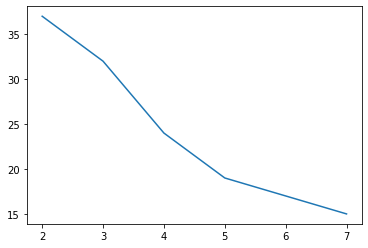

In [30]:
y = np.array([i for i in range(2,8,1)])
plt.plot(y,cost)

In [34]:
df_filecaching = df[df['host'] == 13]

In [35]:
df_filecaching.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
2,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
5,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
9,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
72,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
201,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0


In [36]:
df_filecaching=df_filecaching.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [37]:
df_filecaching=df_filecaching.drop(labels=["protocol","osfamily","cachecontrol", "devicemodel", "devicebrand", "host"],axis=1)

In [38]:
df_filecaching=df_filecaching.drop(labels=["uamajor","devicefamily","cachename", "coordinates"],axis=1)

In [39]:
df_filecaching.head()

,statuscode,contenttype,uafamily,method
2,404,application/octet-stream,21.0,GET
5,404,application/octet-stream,21.0,GET
9,404,application/octet-stream,21.0,GET
72,404,application/octet-stream,21.0,GET
201,404,application/octet-stream,21.0,GET


In [40]:
df_filecaching.drop_duplicates(subset=None, keep='first', inplace=True)

In [41]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2 to 98061
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   7 non-null      int64  
 1   contenttype  7 non-null      object 
 2   uafamily     7 non-null      float64
 3   method       7 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 280.0+ bytes


In [42]:
df_filecaching.statuscode.value_counts().sort_values()

405    1
403    1
401    2
404    3
Name: statuscode, dtype: int64

In [43]:
df_filecaching.nunique()

statuscode     4
contenttype    3
uafamily       4
method         2
dtype: int64

In [44]:
o = df_filecaching.copy()

In [45]:
o_1 = pd.get_dummies(o, columns = ['statuscode', 'contenttype', 'uafamily', 'method'])
print(o_1)

       statuscode_401  statuscode_403  statuscode_404  statuscode_405  \
2                   0               0               1               0   
964                 0               0               1               0   
10539               0               0               0               1   
11752               0               0               1               0   
47053               0               1               0               0   
89171               1               0               0               0   
98061               1               0               0               0   

       contenttype_application/java-archive  \
2                                         0   
964                                       1   
10539                                     0   
11752                                     0   
47053                                     0   
89171                                     0   
98061                                     0   

       contenttype_application/octet-s

For 2 clusters the average silhouette_score is : 0.2556656516409436
For 3 clusters the average silhouette_score is : 0.2939436801980064
For 4 clusters the average silhouette_score is : 0.18881372850092498
For 5 clusters the average silhouette_score is : 0.08368377680384355


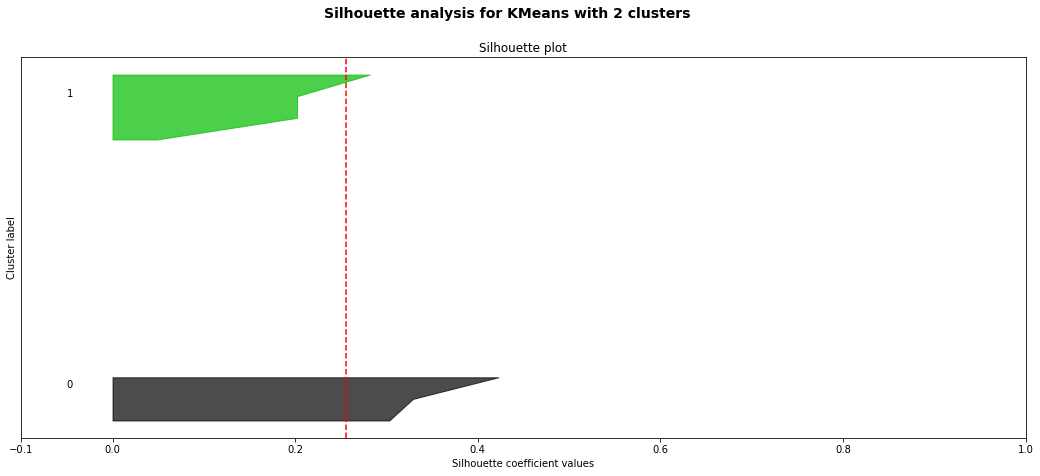

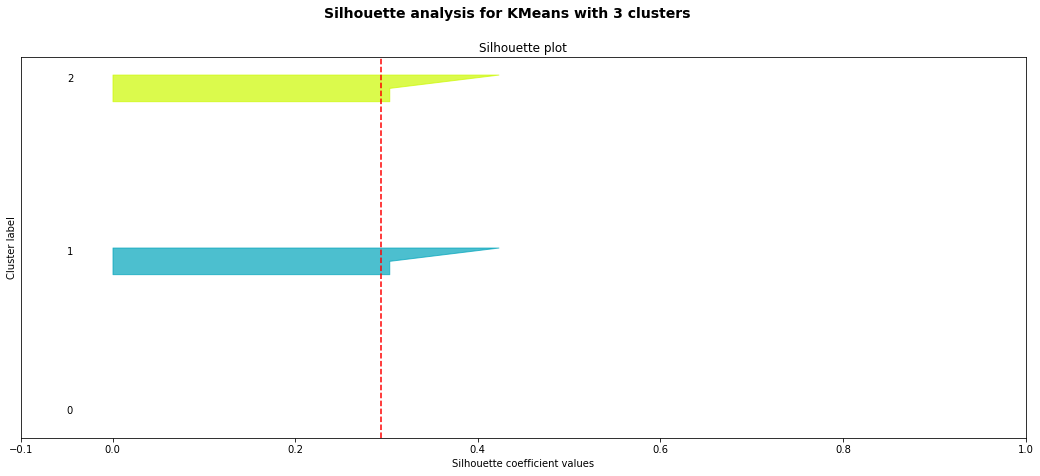

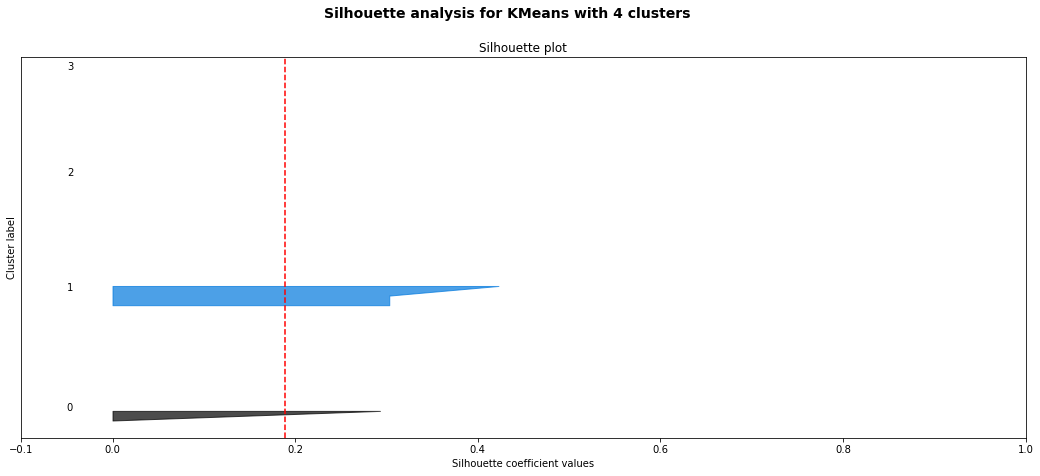

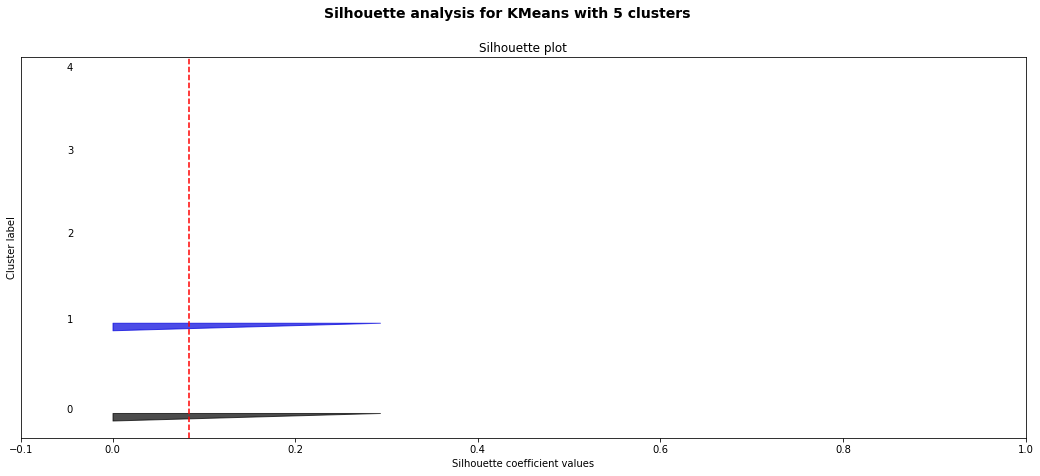

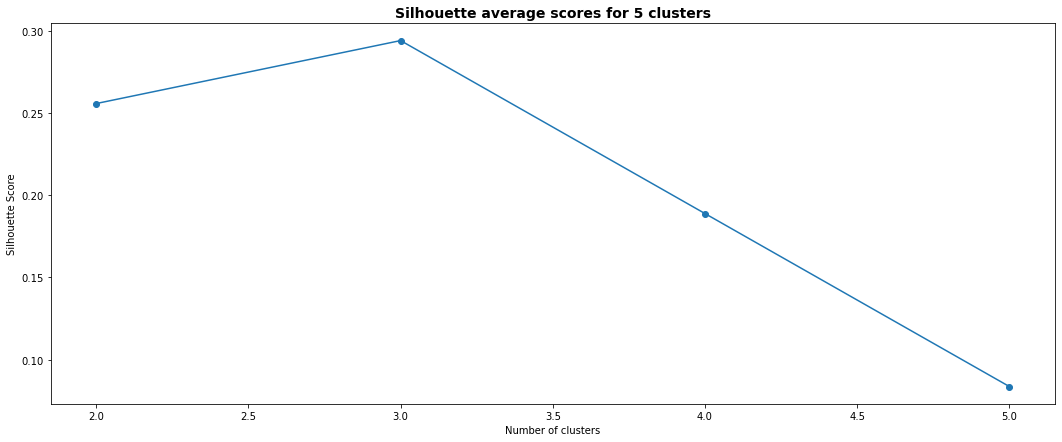

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(o_1)

    labels_pred = kmeans.predict(o_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(o_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(o_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

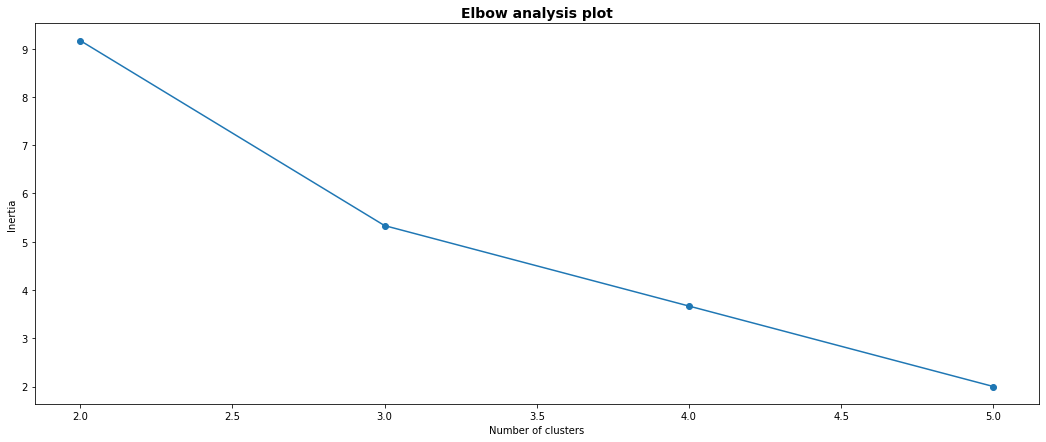

In [49]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [50]:
cost = []
for num_clusters in list(range(2,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(o_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4.0


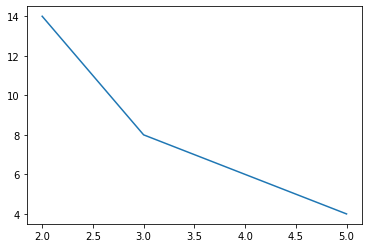

In [51]:
y = np.array([i for i in range(2,6,1)])
plt.plot(y,cost)

In [52]:
df_website = df[df['host'] == 3]

In [53]:
df_website=df_website.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [54]:
df_website=df_website.drop(labels=["protocol","osfamily","cachecontrol"],axis=1)

In [55]:
df_website=df_website.drop(labels=["devicefamily","devicemodel","devicebrand"],axis=1)

In [56]:
df_website=df_website.drop(labels=["host","method","cachename", "coordinates"],axis=1)

In [57]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1660 non-null   int64  
 1   contenttype  1660 non-null   object 
 2   uamajor      1377 non-null   float64
 3   uafamily     1660 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 64.8+ KB


In [58]:
df_website.drop_duplicates(subset=None, keep='first', inplace=True)

In [59]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 76 to 277045
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   65 non-null     int64  
 1   contenttype  65 non-null     object 
 2   uamajor      62 non-null     float64
 3   uafamily     65 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [60]:
df_website.uamajor.value_counts().sort_values()

34.0     1
118.0    1
42.0     1
141.0    1
8.0      1
26.0     1
14.0     1
17.0     1
19.0     1
58.0     1
45.0     1
64.0     1
1.0      1
6.0      1
21.0     1
0.0      1
38.0     1
97.0     1
109.0    1
28.0     1
113.0    1
105.0    1
24.0     1
22.0     1
41.0     1
67.0     1
95.0     1
68.0     1
126.0    1
81.0     1
106.0    1
31.0     1
15.0     1
12.0     2
29.0     2
39.0     2
20.0     2
4.0      2
10.0     2
9.0      2
18.0     3
44.0     3
7.0      4
2.0      5
Name: uamajor, dtype: int64

In [61]:
df_website['uamajor']=df_website['uamajor'].fillna(df_website['uamajor'].mode()[0])

In [62]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 76 to 277045
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   65 non-null     int64  
 1   contenttype  65 non-null     object 
 2   uamajor      65 non-null     float64
 3   uafamily     65 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [63]:
df_website.nunique()

statuscode      2
contenttype     2
uamajor        44
uafamily       24
dtype: int64

In [64]:
g = df_website.copy()

In [65]:
g_1 = pd.get_dummies(g, columns = ['statuscode', 'contenttype', 'uafamily', 'uamajor'])
print(g_1)

        statuscode_403  statuscode_405  contenttype_text/html  \
76                   1               0                      1   
623                  1               0                      1   
730                  1               0                      1   
743                  1               0                      1   
757                  1               0                      1   
...                ...             ...                    ...   
216755               0               1                      0   
218485               0               1                      0   
248511               1               0                      1   
269061               1               0                      1   
277045               1               0                      1   

        contenttype_text/html; charset=utf-8  uafamily_0.0  uafamily_1.0  \
76                                         0             0             0   
623                                        0             0         

For 2 clusters the average silhouette_score is : 0.3008434699423166
For 3 clusters the average silhouette_score is : 0.0649817200050612
For 4 clusters the average silhouette_score is : 0.08553662693716792
For 5 clusters the average silhouette_score is : 0.10977468580061252
For 6 clusters the average silhouette_score is : 0.11284580434450854
For 7 clusters the average silhouette_score is : 0.13640003933695002


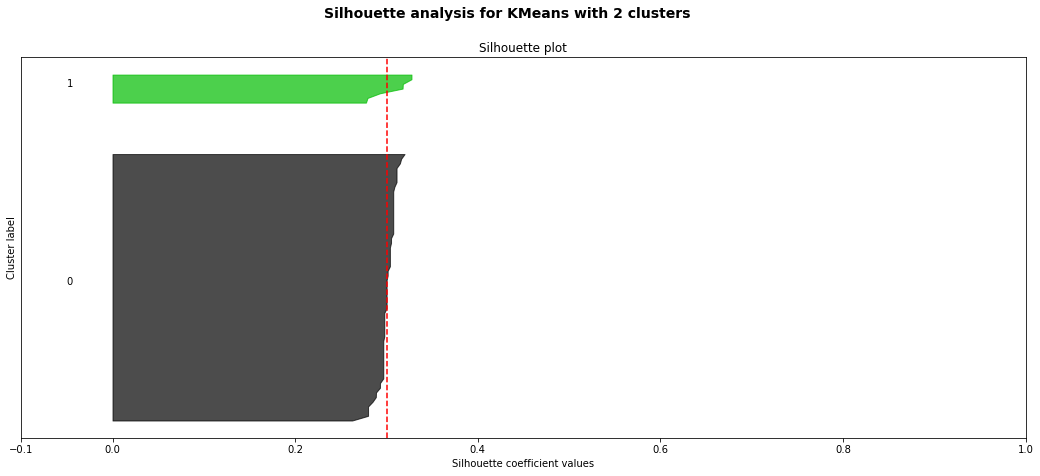

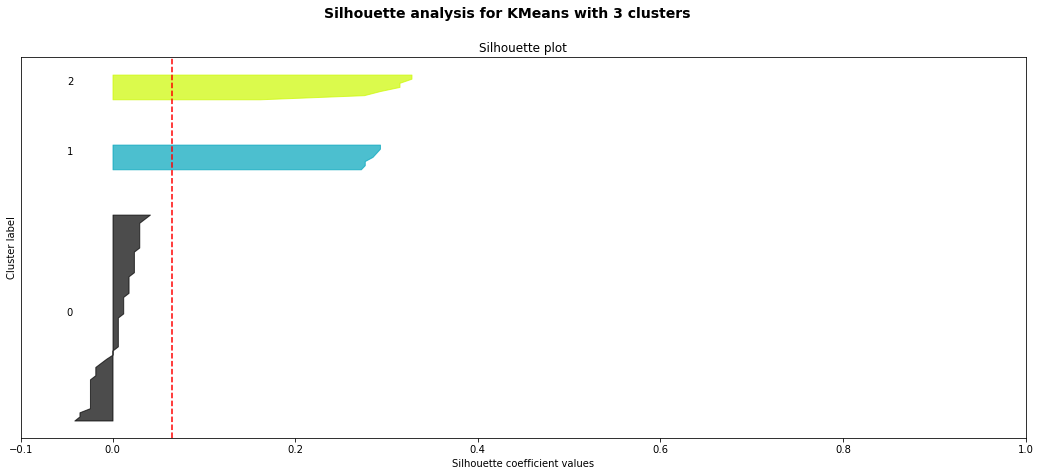

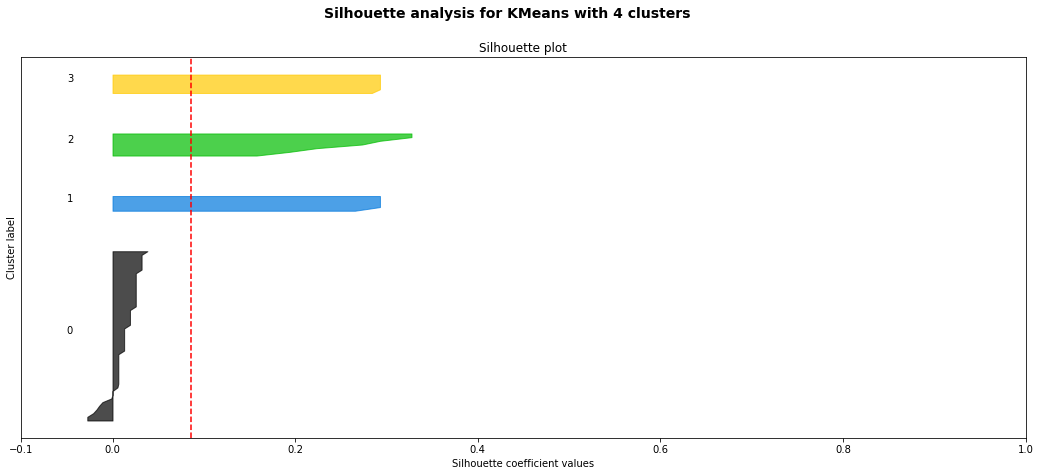

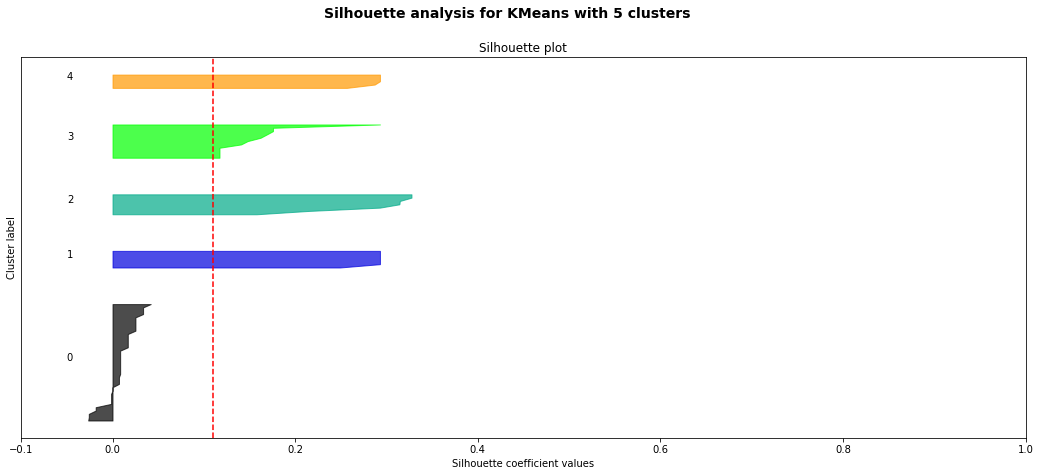

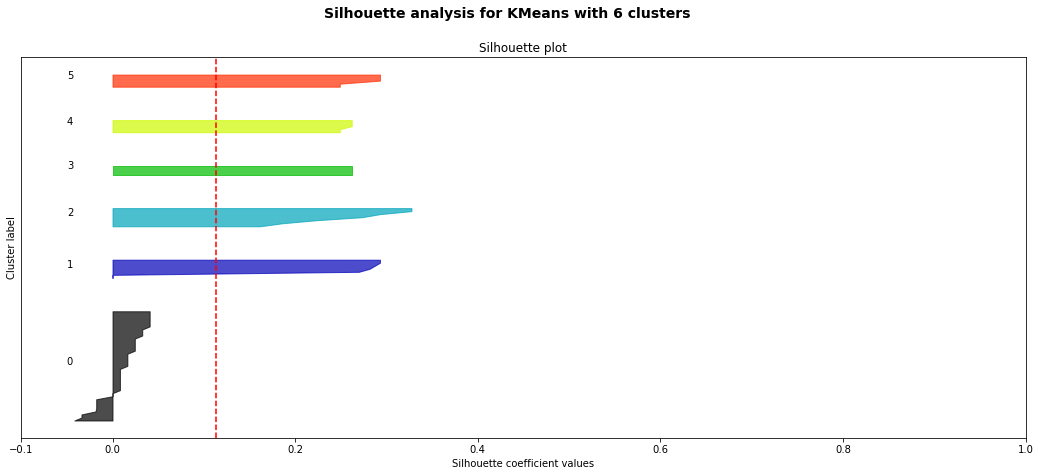

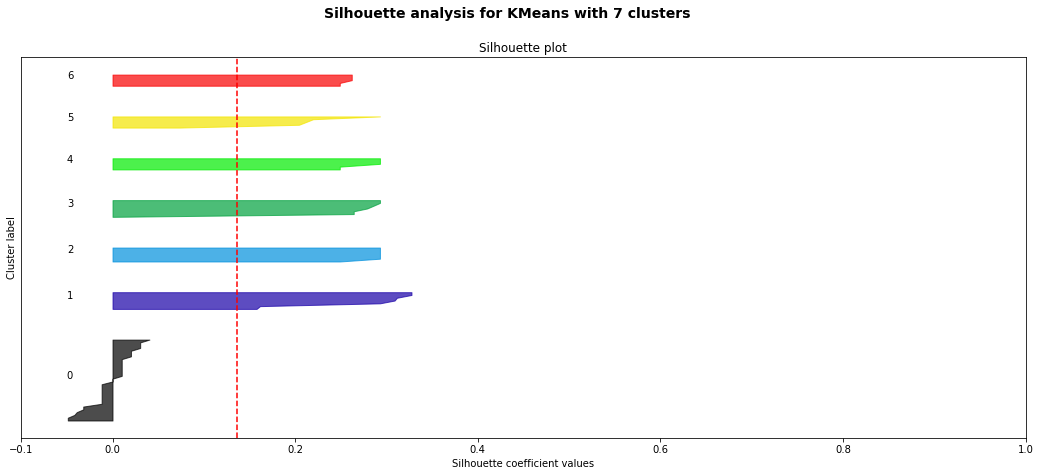

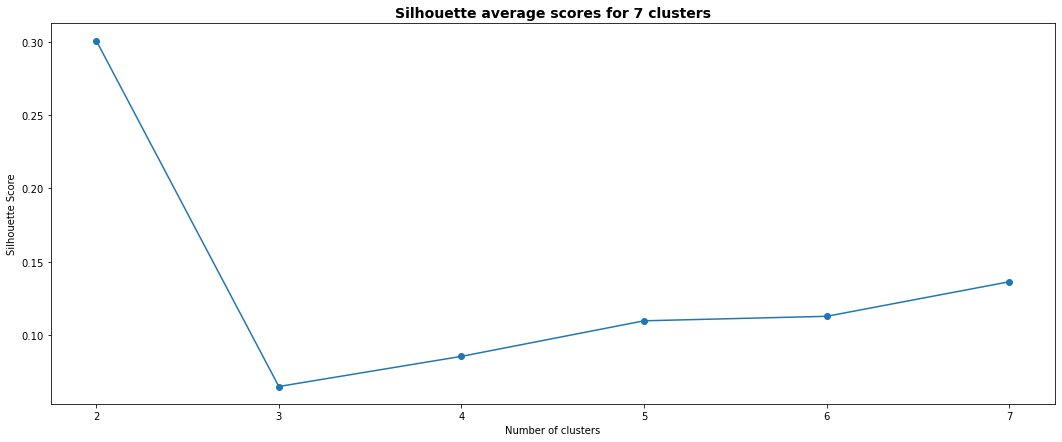

In [69]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(g_1)

    labels_pred = kmeans.predict(g_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(g_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(g_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

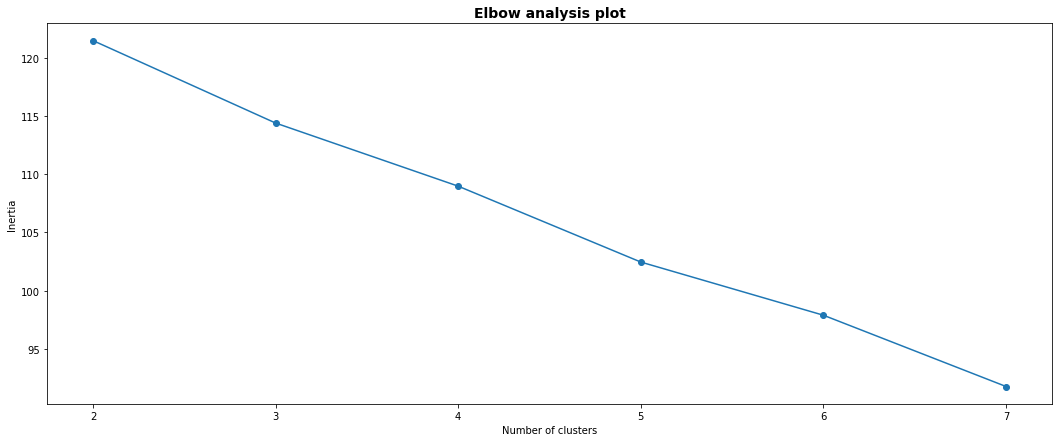

In [67]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [72]:
cost = []
for num_clusters in list(range(1,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(g_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 158.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 130.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 124.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 118.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 113.0


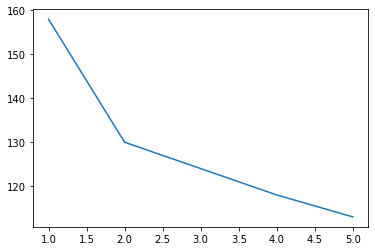

In [73]:
y = np.array([i for i in range(1,6,1)])
plt.plot(y,cost)

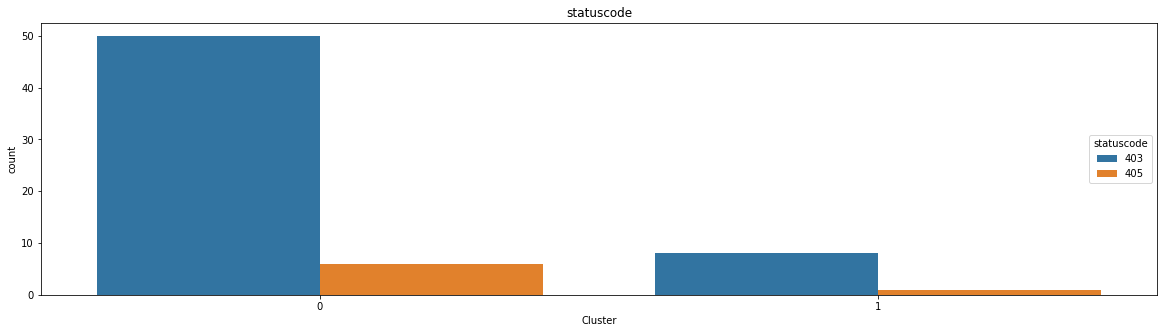

In [81]:
km = KModes(n_clusters=2, init = "Cao", verbose=1)
cluster_labels = km.fit_predict(g)
g['Cluster'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = g)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

In [80]:
km = KModes(n_clusters=2, init = "Cao", verbose=1)
cluster_labels = km.fit_predict(g)
g['Cluster'] = cluster_labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 118.0


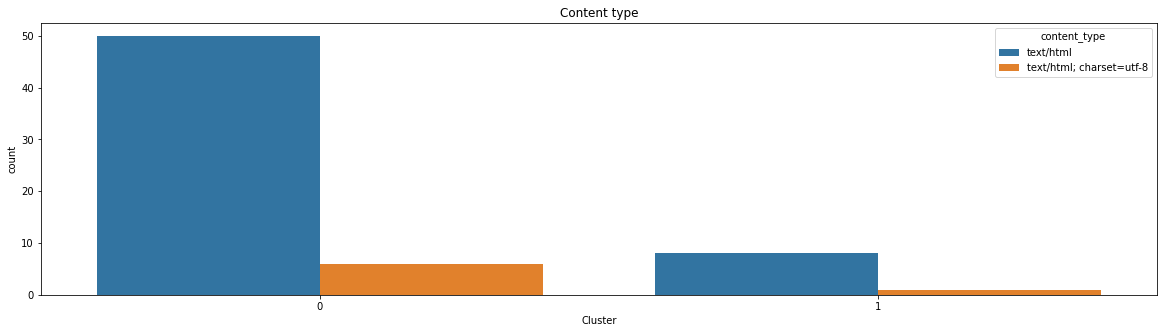

In [83]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = g)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.show()

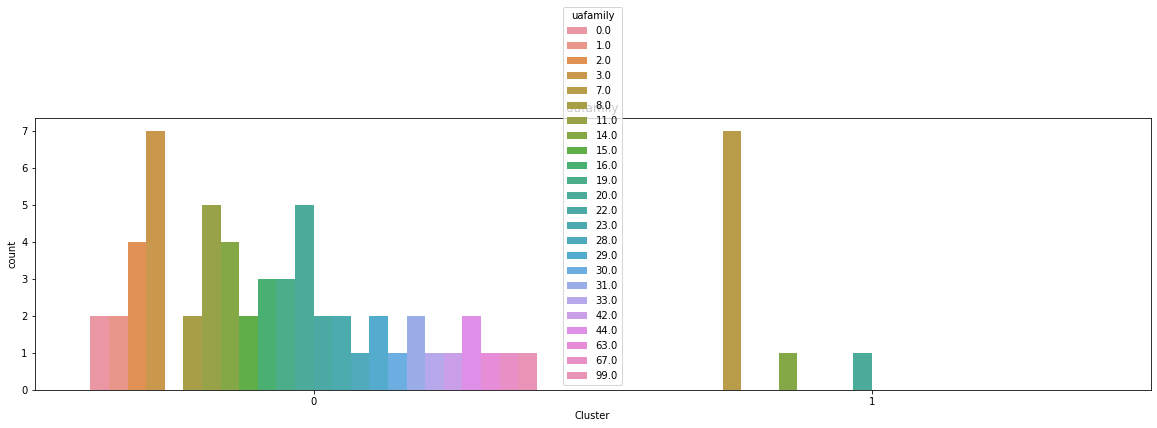

In [84]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = g)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.show()

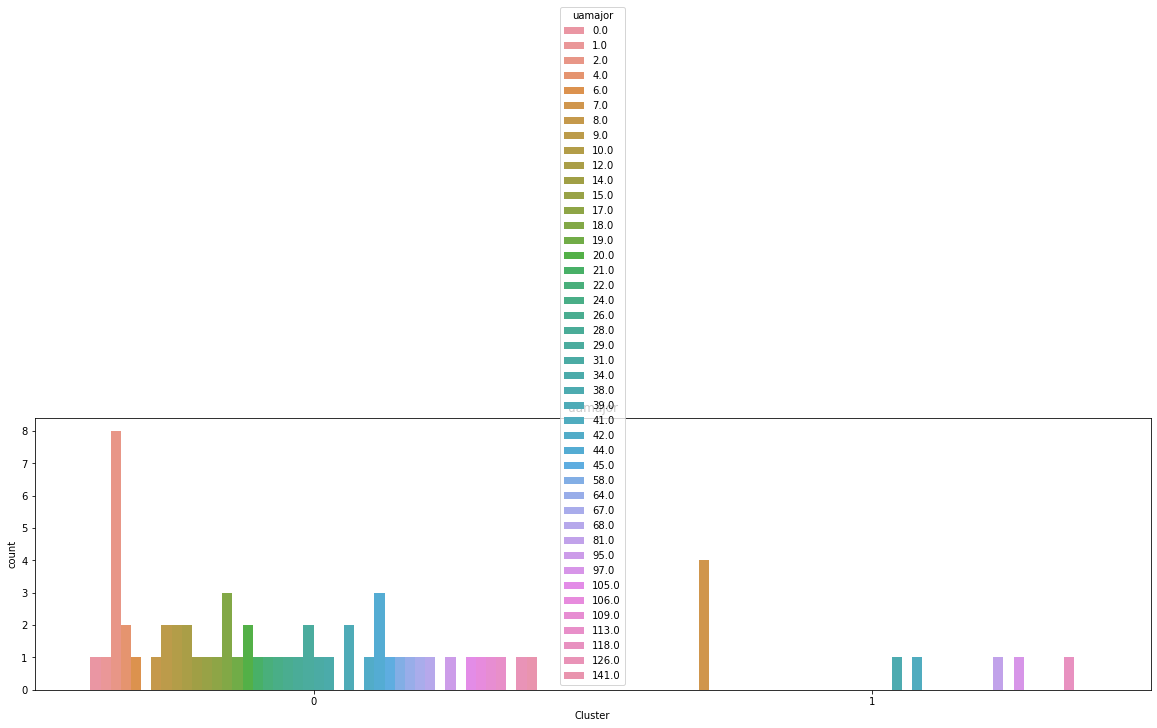

In [85]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uamajor", data = g)
ax.set_title('uamajor')
ax.legend(loc='best', title="uamajor")
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12.0


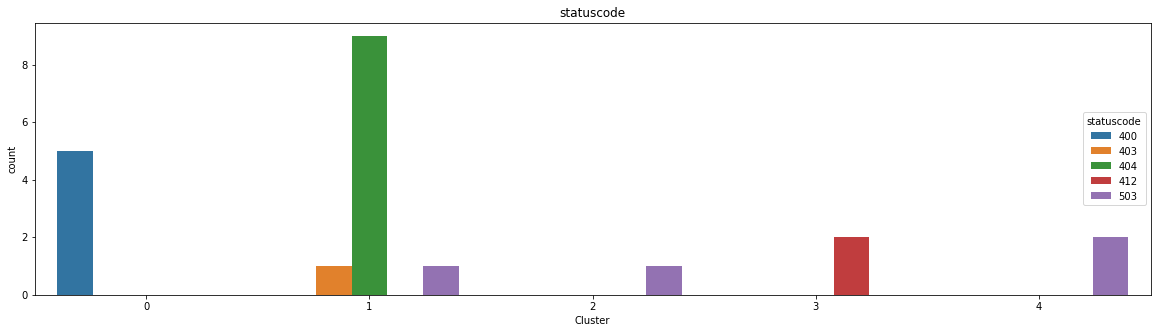

In [89]:
km = KModes(n_clusters=5, init = "Cao", verbose=1)
cluster_labels = km.fit_predict(n)
n['Cluster'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = n)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

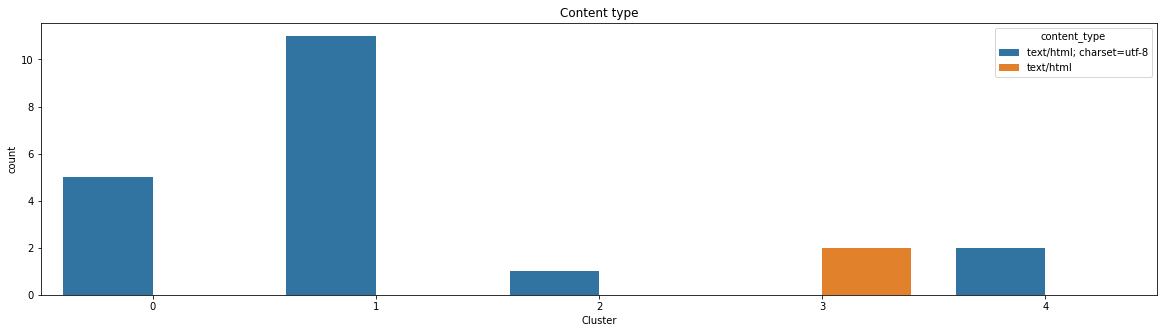

In [90]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = n)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.show()

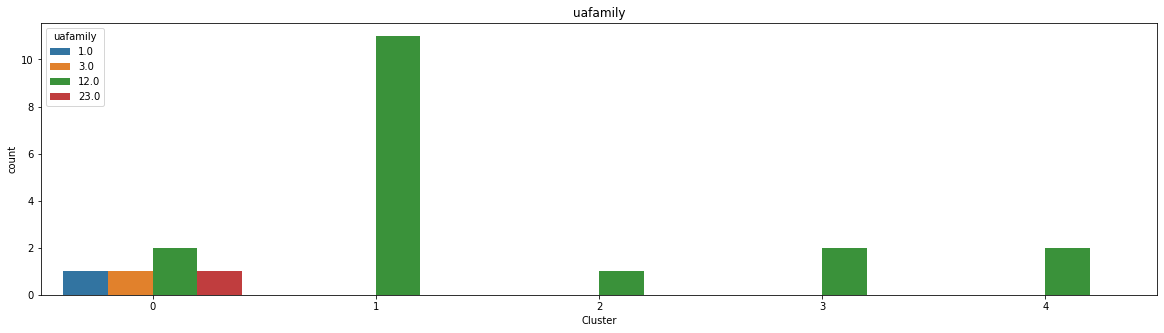

In [91]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = n)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.show()

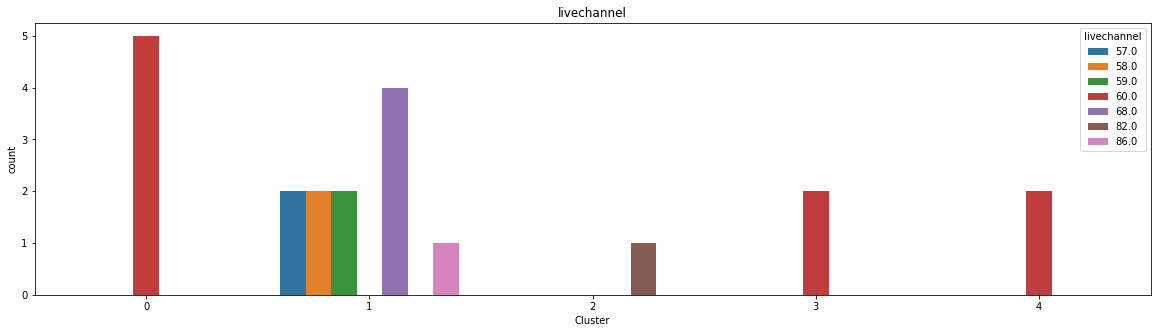

In [92]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="livechannel", data = n)
ax.set_title('livechannel')
ax.legend(loc='best', title="livechannel")
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4.0


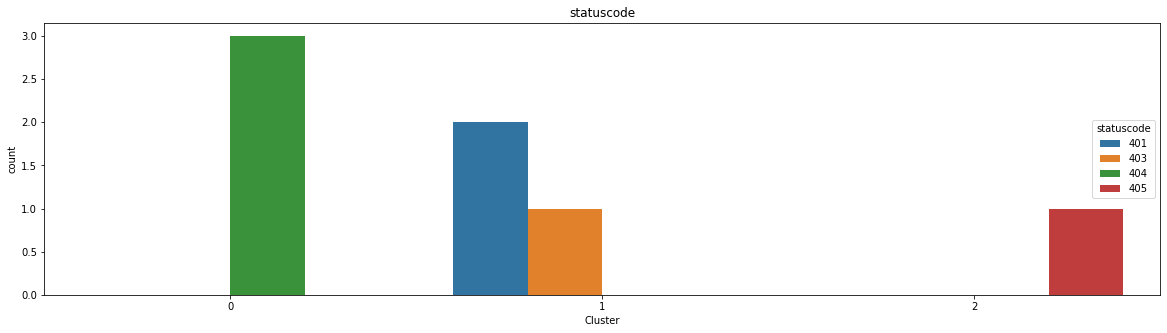

In [93]:
km = KModes(n_clusters=3, init = "Cao", verbose=1)
cluster_labels = km.fit_predict(o)
o['Cluster'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = o)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

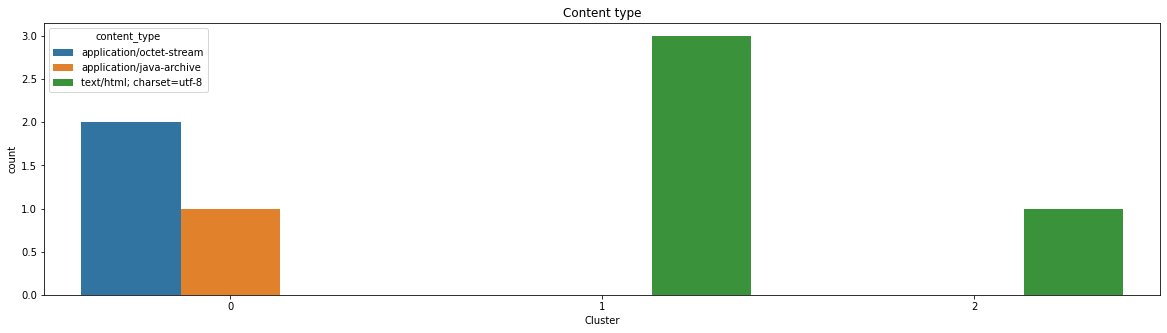

In [94]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = o)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.show()

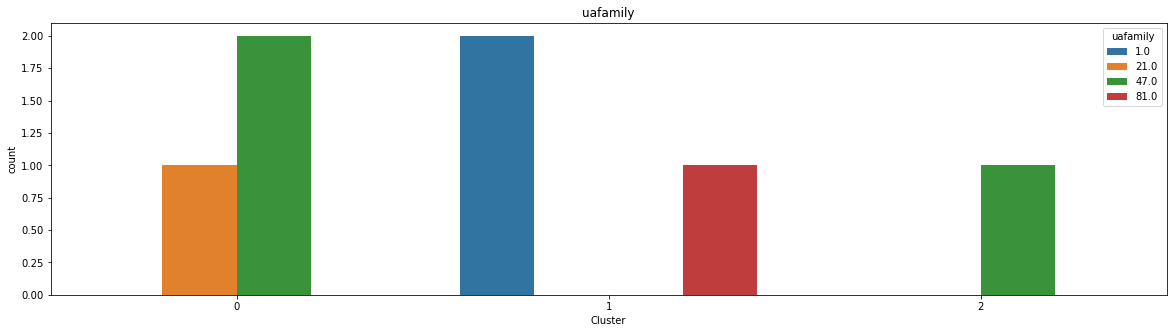

In [95]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = o)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.show()

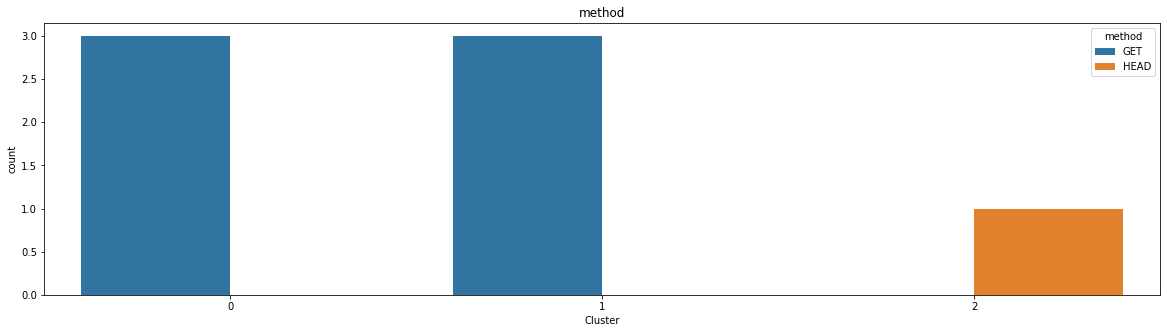

In [96]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="method", data = o)
ax.set_title('method')
ax.legend(loc='best', title="method")
plt.show()

In [102]:
kmeans = KMeans(n_clusters=4, random_state=100)
cluster_labels = kmeans.fit_predict(n_1)
n['Clusterkmeans'] = cluster_labels

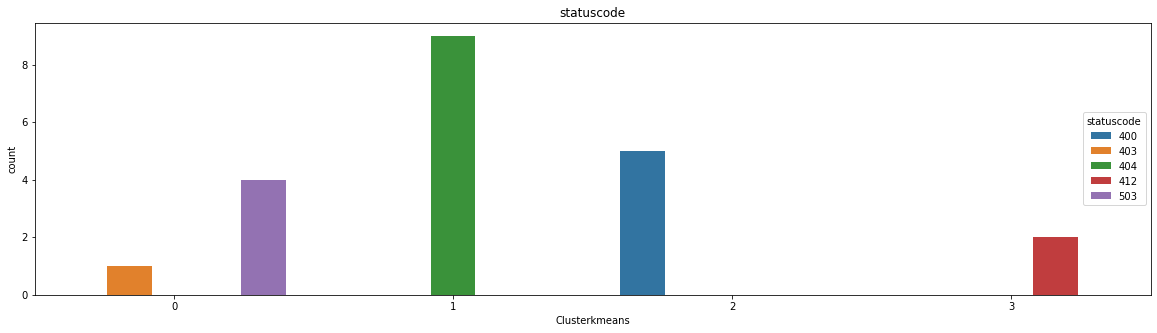

In [103]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="statuscode", data = n)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

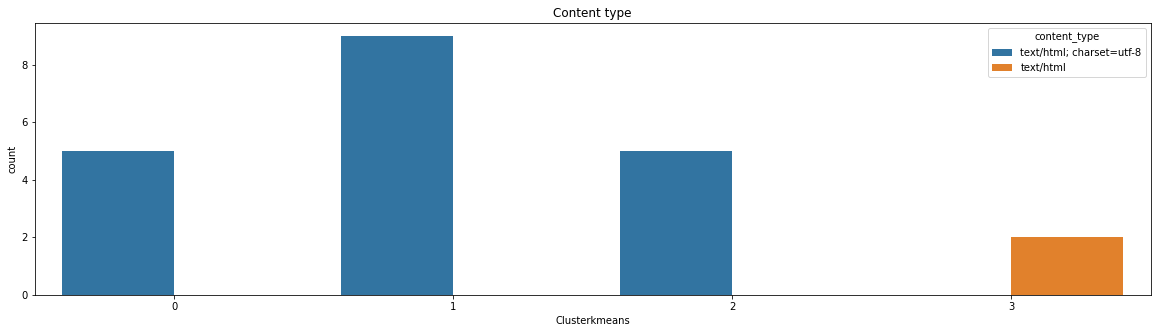

In [105]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="contenttype", data = n)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.show()

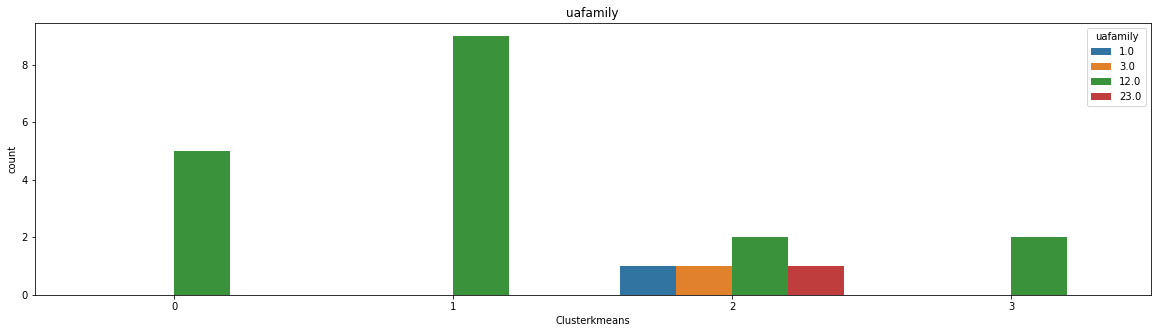

In [106]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uafamily", data = n)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.show()

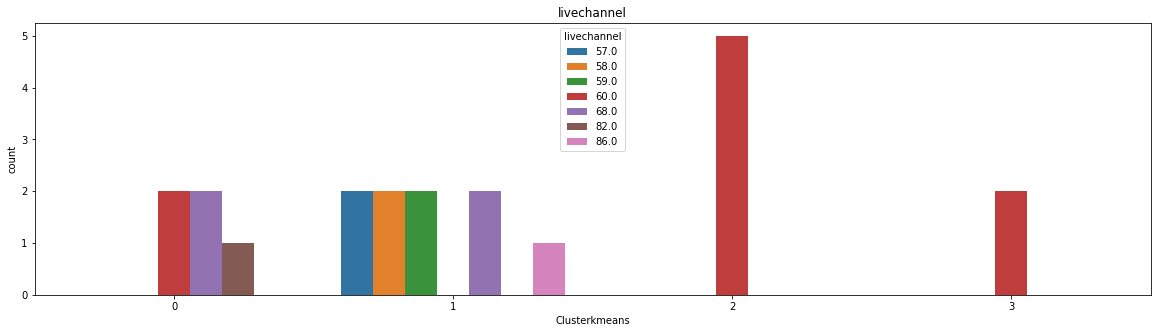

In [107]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="livechannel", data = n)
ax.set_title('livechannel')
ax.legend(loc='best', title="livechannel")
plt.show()

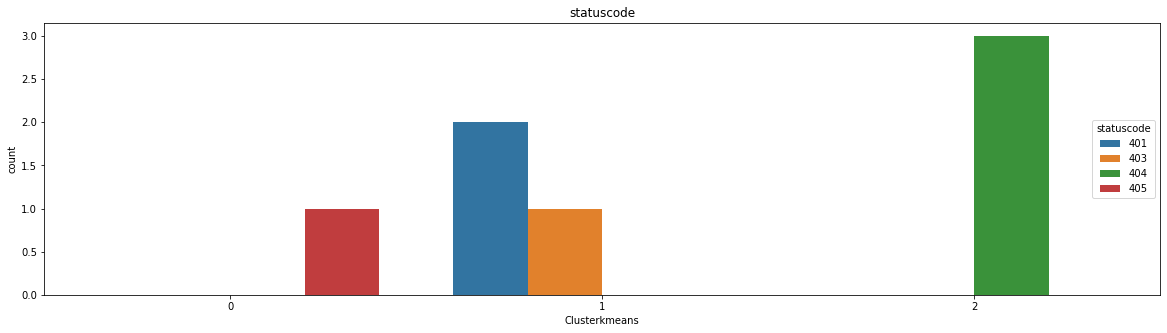

In [108]:
kmeans = KMeans(n_clusters=3, random_state=100)
cluster_labels = kmeans.fit_predict(o_1)
o['Clusterkmeans'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="statuscode", data = o)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

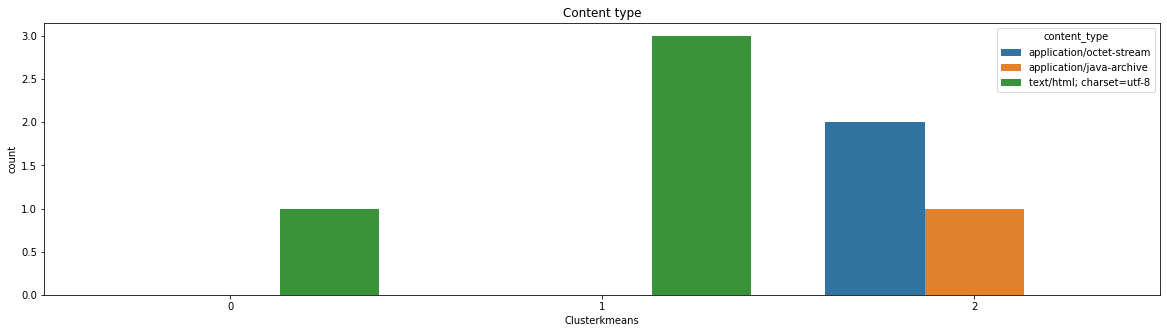

In [110]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="contenttype", data = o)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.show()

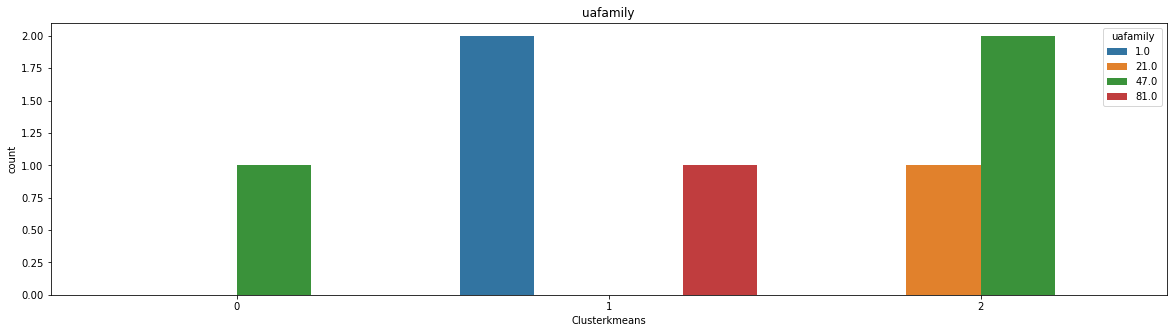

In [111]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uafamily", data = o)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.show()

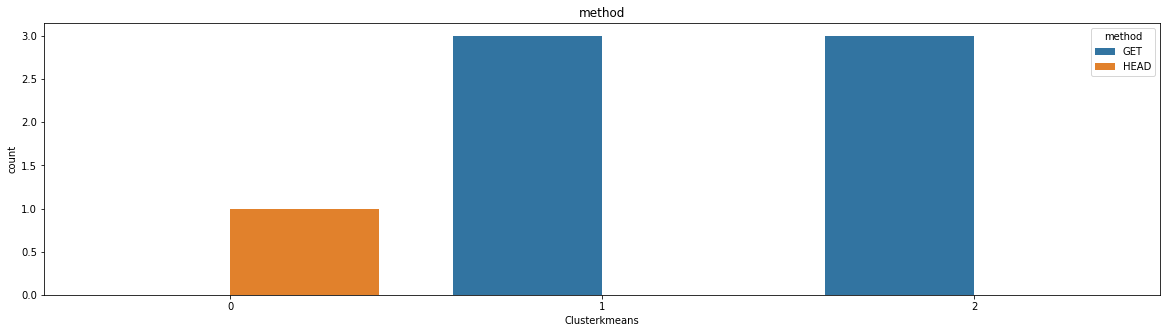

In [112]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="method", data = o)
ax.set_title('method')
ax.legend(loc='best', title="method")
plt.show()

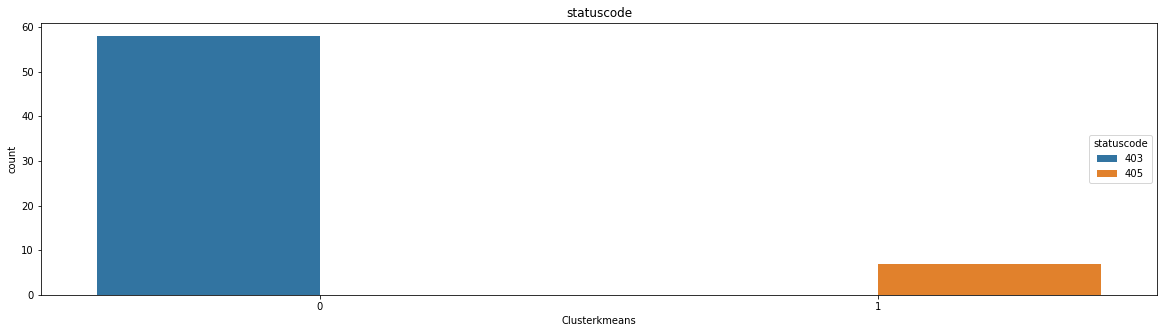

In [113]:
kmeans = KMeans(n_clusters=2, random_state=100)
cluster_labels = kmeans.fit_predict(g_1)
g['Clusterkmeans'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="statuscode", data = g)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

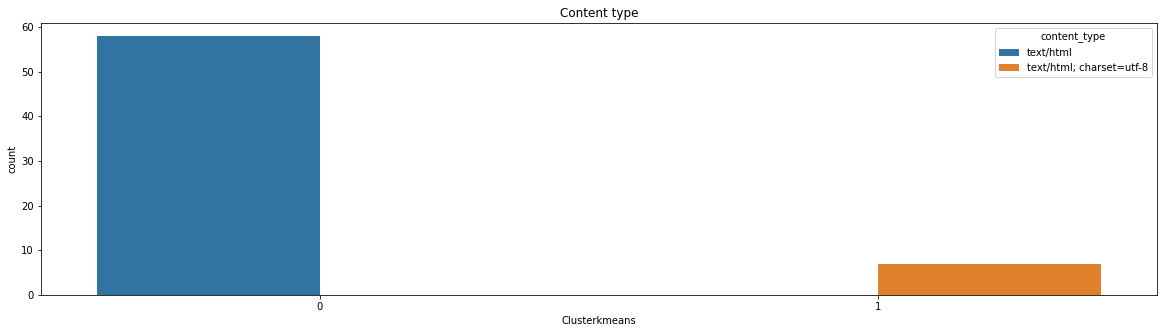

In [114]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="contenttype", data = g)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.show()

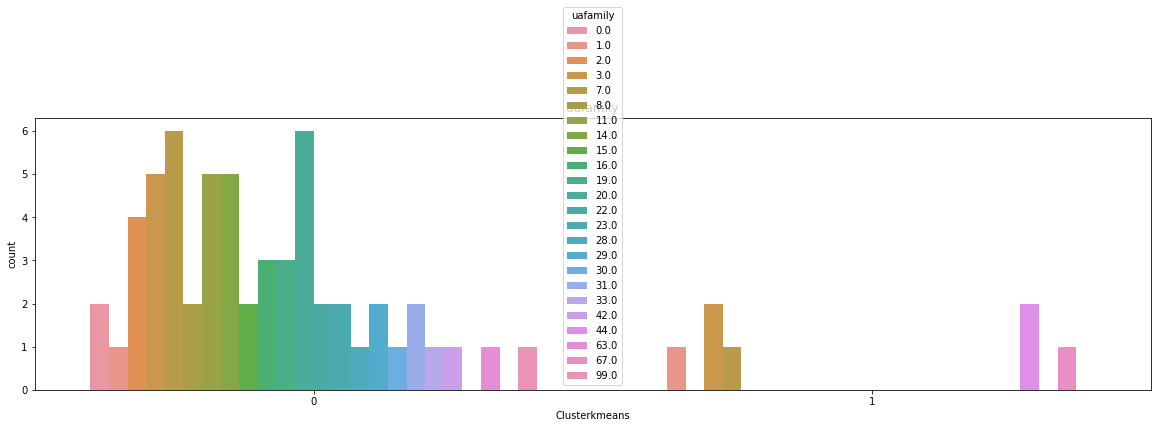

In [115]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uafamily", data = g)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.show()

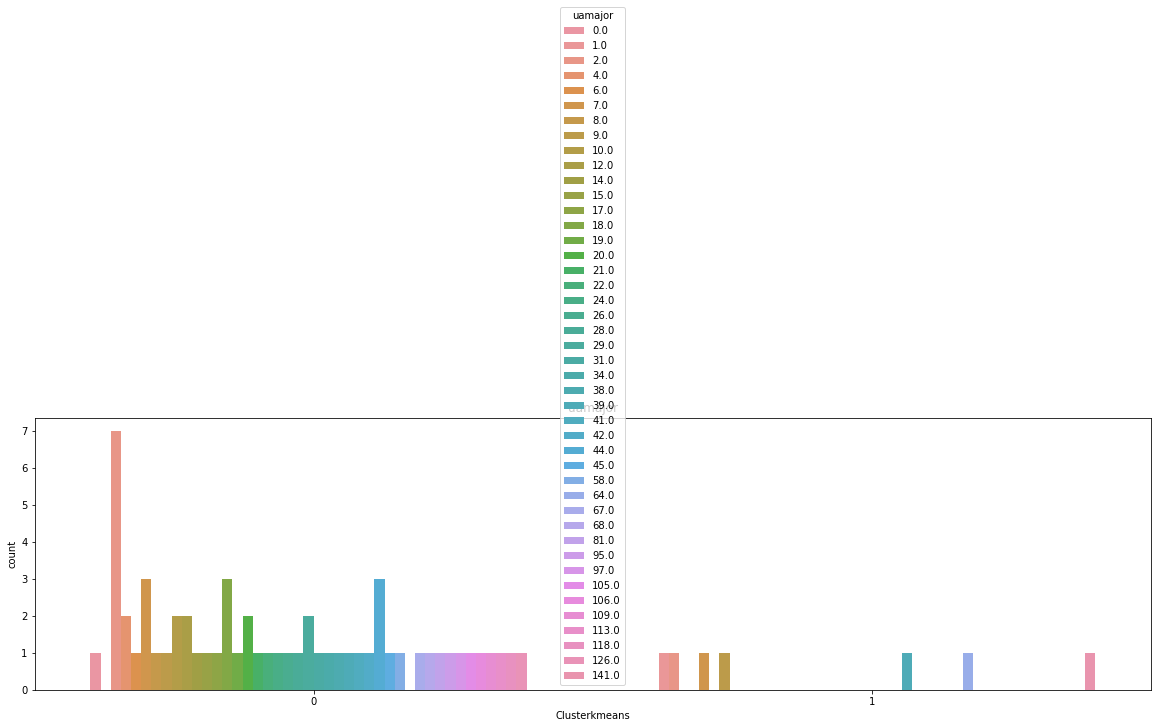

In [116]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uamajor", data = g)
ax.set_title('uamajor')
ax.legend(loc='best', title="uamajor")
plt.show()